# Confocal_FISH_WF_default
Using the GT image, we determine the optimal window size. Es of the variance is performed by 

In [1]:
import time
from collections import namedtuple

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

import scipy.ndimage

try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

#from ipywidgets import *
try:
    import cv2
except:
    !pip install cv2
    import cv2
    
#import kernels
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io

try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

import utils

In [2]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

In [3]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)

In [4]:
try:
    from scipy.signal import wiener
except:
    !pip install scipy
    from scipy.signal import wiener

In [5]:
Args = namedtuple("args", ["clean", "noisy"])
args = Args("http://www.hpca.ual.es/~vruiz/images/FDM/Confocal_FISH.png",
         "http://www.hpca.ual.es/~vruiz/images/FDM/Confocal_FISH_1.png")

In [6]:
Y = skimage_io.imread(args.noisy)

In [7]:
X = skimage_io.imread(args.clean)

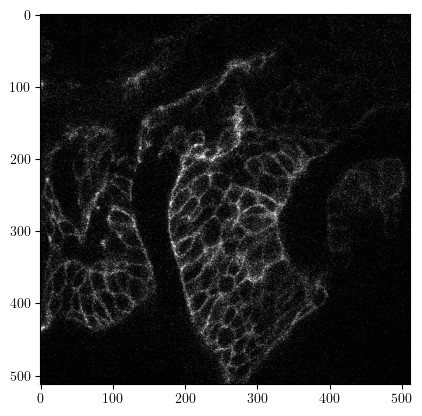

In [8]:
plt.imshow(Y, cmap="gray")

In [83]:
#denoised = wiener(Y.astype(np.float32), (3, 3))
denoised = wiener(Y.astype(np.float32), mysize=(1, 1), noise=0.0)

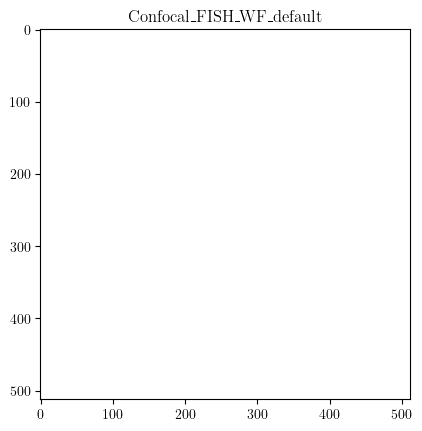

In [84]:
plt.title(r"$\mathrm{Confocal\_FISH\_WF\_default}$")
plt.imshow(denoised, cmap="gray")
plt.savefig('Confocal_FISH_WF_default.pdf', bbox_inches='tight')

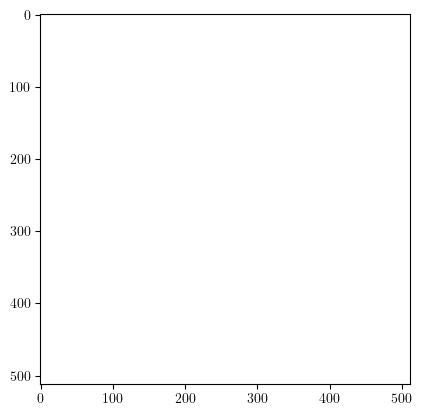

In [85]:
plt.imshow(denoised)

/tmp/ipykernel_229434/2427975127.py:1: RuntimeWarning: invalid value encountered in cast
  plt.imshow(cv2.equalizeHist(((Y-denoised) + 128).astype(np.uint8)), cmap="gray")


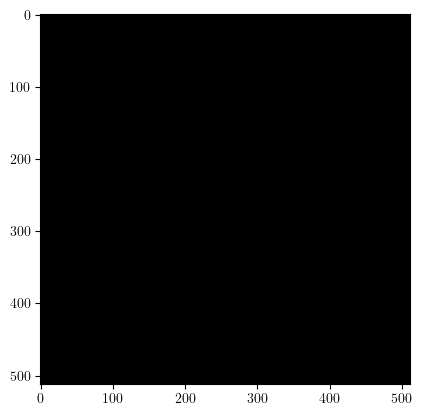

In [86]:
plt.imshow(cv2.equalizeHist(((Y-denoised) + 128).astype(np.uint8)), cmap="gray")

In [35]:
PCC = np.corrcoef(denoised.flatten(), X.flatten())[0, 1]

In [25]:
print(PCC)

0.7710879707849043
